# Power Consumption Factor Project

1- Read the data

In [70]:
import pandas as pd


df = pd.read_excel("/content/Active Power Load - 33_11KV .xlsx")
df.head()

,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),Substation Shutdown,F1,F2,F3,F4,Jul-Oct-,Rainy,0
0,2021-01-01,01-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,Nov-Feb,Winter,1.0
1,NaT,02-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,Mar-Jun,Summer,2.0
2,NaT,03-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,04-00,11.3,130,0.96,2442.607331,0,1,78,49,NaN,NaN,NaN,NaN,NaN,Weekend,1,NaN
4,NaT,05-00,11.2,148,0.96,2756.205522,0,1,78,49,NaN,NaN,NaN,NaN,NaN,Weekday,0,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 365 non-null    datetime64[ns]
 1   TIME                 8760 non-null   object        
 2   VOLTAGE              8760 non-null   float64       
 3   CURRENT              8760 non-null   int64         
 4   PF                   8760 non-null   float64       
 5   POWER (KW)           8760 non-null   float64       
 6   "WEEKEND/WEEKDAY"    8760 non-null   int64         
 7   SEASON               8760 non-null   int64         
 8   Temp (F)             8760 non-null   int64         
 9   Humidity (%)         8760 non-null   int64         
 10  Substation Shutdown  66 non-null     float64       
 11  F1                   25 non-null     float64       
 12  F2                   71 non-null     float64       
 13  F3                   97 non-null 

In [72]:
df.describe()

,DATE,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),Substation Shutdown,F1,F2,F3,F4,0
count,365,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000,8760.000000,66.0,25.0,71.0,97.0,46.0,2.000000
mean,2021-07-02 00:00:00,11.550228,114.802854,0.929584,2129.985907,0.142466,0.99726,81.184132,67.726712,1.0,1.0,1.0,1.0,1.0,1.500000
min,2021-01-01 00:00:00,11.000000,21.000000,0.690000,412.034103,0.000000,0.00000,50.000000,14.000000,1.0,1.0,1.0,1.0,1.0,1.000000
25%,2021-04-02 00:00:00,11.400000,56.750000,0.900000,1062.656472,0.000000,0.00000,76.000000,52.000000,1.0,1.0,1.0,1.0,1.0,1.250000
50%,2021-07-02 00:00:00,11.600000,92.000000,0.960000,1683.688485,0.000000,1.00000,81.000000,72.000000,1.0,1.0,1.0,1.0,1.0,1.500000
75%,2021-10-01 00:00:00,11.700000,164.000000,0.970000,3025.768919,0.000000,2.00000,86.000000,87.000000,1.0,1.0,1.0,1.0,1.0,1.750000
max,2021-12-31 00:00:00,12.000000,379.000000,1.000000,6306.206465,1.000000,2.00000,108.000000,102.000000,1.0,1.0,1.0,1.0,1.0,2.000000
std,NaN,0.179907,69.966107,0.058151,1302.278205,0.349547,0.81933,8.881827,20.684501,0.0,0.0,0.0,0.0,0.0,0.707107


In [73]:
df['DATE'] = df['DATE'].fillna(method='ffill')

<ipython-input-73-ea4da8b2fa48>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DATE'] = df['DATE'].fillna(method='ffill')


In [74]:
df['DATE']

,DATE
0,2021-01-01
1,2021-01-01
2,2021-01-01
3,2021-01-01
4,2021-01-01
...,...
8755,2021-12-31
8756,2021-12-31
8757,2021-12-31
8758,2021-12-31


In [75]:
df['DATE'] = pd.to_datetime(df['DATE'], yearfirst=True)
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

In [76]:
df

,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),...,F1,F2,F3,F4,Jul-Oct-,Rainy,0,year,month,day
0,2021-01-01,01-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,NaN,Nov-Feb,Winter,1.0,2021,1,1
1,2021-01-01,02-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,NaN,Mar-Jun,Summer,2.0,2021,1,1
2,2021-01-01,03-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,1
3,2021-01-01,04-00,11.3,130,0.96,2442.607331,0,1,78,49,...,NaN,NaN,NaN,NaN,Weekend,1,NaN,2021,1,1
4,2021-01-01,05-00,11.2,148,0.96,2756.205522,0,1,78,49,...,NaN,NaN,NaN,NaN,Weekday,0,NaN,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,20-00,11.6,64,0.95,1221.580794,0,1,67,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,31
8756,2021-12-31,21-00,11.5,62,0.95,1173.204615,0,1,67,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,31
8757,2021-12-31,22-00,11.5,57,0.95,1078.591339,0,1,65,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,31
8758,2021-12-31,23-00,11.5,48,0.95,908.287443,0,1,65,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,31


In [77]:
# prompt: make the day column transfer it's values to it's actual names of the days

df['day_name'] = df['DATE'].dt.day_name()
df.head()


,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),...,F2,F3,F4,Jul-Oct-,Rainy,0,year,month,day,day_name
0,2021-01-01,01-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,Nov-Feb,Winter,1.0,2021,1,1,Friday
1,2021-01-01,02-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,Mar-Jun,Summer,2.0,2021,1,1,Friday
2,2021-01-01,03-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,1,Friday
3,2021-01-01,04-00,11.3,130,0.96,2442.607331,0,1,78,49,...,NaN,NaN,NaN,Weekend,1,NaN,2021,1,1,Friday
4,2021-01-01,05-00,11.2,148,0.96,2756.205522,0,1,78,49,...,NaN,NaN,NaN,Weekday,0,NaN,2021,1,1,Friday


In [78]:
df.head()

,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),...,F2,F3,F4,Jul-Oct-,Rainy,0,year,month,day,day_name
0,2021-01-01,01-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,Nov-Feb,Winter,1.0,2021,1,1,Friday
1,2021-01-01,02-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,Mar-Jun,Summer,2.0,2021,1,1,Friday
2,2021-01-01,03-00,11.6,102,0.96,1967.388015,0,1,65,90,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,1,Friday
3,2021-01-01,04-00,11.3,130,0.96,2442.607331,0,1,78,49,...,NaN,NaN,NaN,Weekend,1,NaN,2021,1,1,Friday
4,2021-01-01,05-00,11.2,148,0.96,2756.205522,0,1,78,49,...,NaN,NaN,NaN,Weekday,0,NaN,2021,1,1,Friday


In [79]:
df['day_name'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [80]:
df['day_name'].value_counts() / 24

,count
day_name,
Friday,53.0
Saturday,52.0
Sunday,52.0
Monday,52.0
Tuesday,52.0
Wednesday,52.0
Thursday,52.0


In [81]:
df['"WEEKEND/WEEKDAY"'].fillna(0)

,"""WEEKEND/WEEKDAY"""
0,0
1,0
2,0
3,0
4,0
...,...
8755,0
8756,0
8757,0
8758,0


In [82]:
(df.isnull().sum() / len(df) ) * 100

,0
DATE,0.000000
TIME,0.000000
VOLTAGE,0.000000
CURRENT,0.000000
PF,0.000000
POWER (KW),0.000000
"""WEEKEND/WEEKDAY""",0.000000
SEASON,0.000000
Temp (F),0.000000
Humidity (%),0.000000


#### Total number of hours substation shutdown happened in the year 2021 is 66 hours. During the year 2021, godishala town feeder (F1) has 25 outage hours, Bommakal feeder (F2)  has 71 outage hours, Godishala rural feeder (F3)  has 97outage hours and Raikal feeder(F4)  has 46 outage hours.

In [83]:
df[['F1','F2','F3','F4']] = df[['F1','F2','F3','F4']].fillna(0)

df[['F1','F2','F3','F4']]

,F1,F2,F3,F4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
8755,0.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0


## First Section

In [84]:
df['SEASON'].unique()

array([1, 2, 0])

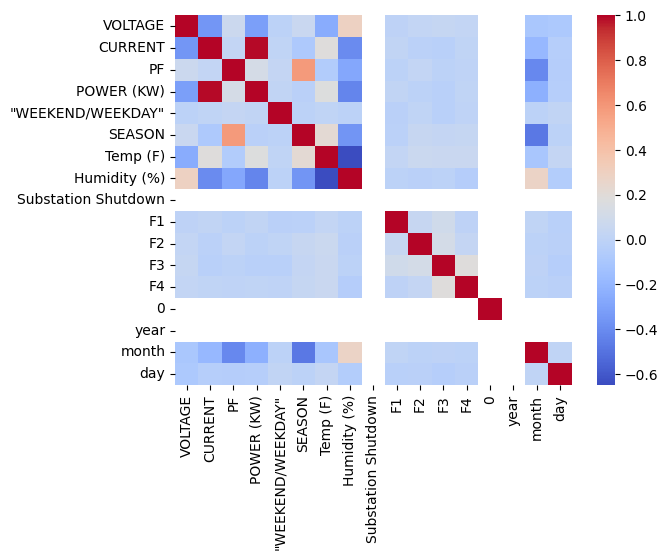

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='coolwarm')
plt.show()

In [86]:
df[df['SEASON'] == 0]

,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),...,F2,F3,F4,Jul-Oct-,Rainy,0,year,month,day,day_name
4344,2021-07-01,01-00,11.8,44,0.940,845.323933,0,0,80,91,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,7,1,Thursday
4345,2021-07-01,02-00,11.8,44,0.940,845.323933,0,0,80,91,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,7,1,Thursday
4346,2021-07-01,03-00,11.8,44,0.940,845.323933,0,0,80,91,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,7,1,Thursday
4347,2021-07-01,04-00,11.8,44,0.940,845.323933,0,0,84,87,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,7,1,Thursday
4348,2021-07-01,05-00,11.8,44,0.940,845.323933,0,0,84,87,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,7,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2021-10-31,20-00,11.6,62,0.947,1179.669321,1,0,74,91,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,10,31,Sunday
7292,2021-10-31,21-00,11.6,55,0.947,1046.480849,1,0,74,91,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,10,31,Sunday
7293,2021-10-31,22-00,11.7,51,0.947,978.738437,1,0,69,92,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,10,31,Sunday
7294,2021-10-31,23-00,11.7,45,0.947,863.592738,1,0,69,92,...,0.0,0.0,0.0,NaN,NaN,NaN,2021,10,31,Sunday


In [96]:
new_df = df.groupby(['DATE', 'PF'])
new_df = pd.DataFrame(new_df)
new_df.head(20)[0]

,0
0,"(2021-01-01 00:00:00, 0.96)"
1,"(2021-01-02 00:00:00, 0.95)"
2,"(2021-01-02 00:00:00, 0.950000000000001)"
3,"(2021-01-03 00:00:00, 0.96)"
4,"(2021-01-04 00:00:00, 0.97)"
5,"(2021-01-05 00:00:00, 0.96)"
6,"(2021-01-06 00:00:00, 0.94)"
7,"(2021-01-07 00:00:00, 0.98)"
8,"(2021-01-08 00:00:00, 0.97)"
9,"(2021-01-09 00:00:00, 0.97)"


In [105]:
changes_df = df.groupby('DATE')['PF'].nunique().reset_index()
changes_df['PF'].value_counts()

,count
PF,
1,359
3,3
2,2
4,1


In [103]:
df[df['DATE'] == '2021-05-31']['PF']

,PF
3600,0.9
3601,0.9
3602,0.9
3603,0.9
3604,0.9
3605,0.9
3606,0.9
3607,0.9
3608,0.9
3609,0.9
